In [78]:
import pandas as pd
df_wine = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",
    header=None)

In [79]:
columns = [
    "Class label",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"]

In [80]:
df_wine.columns=columns

In [81]:
X,y=df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

In [82]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [83]:
from sklearn.ensemble import RandomForestClassifier
clsf = RandomForestClassifier(
    n_estimators=10000,
    random_state=0,
    n_jobs=-1)

clsf.fit(X_train,y_train)
clsf.feature_importances_

array([ 0.10658906,  0.02539968,  0.01391619,  0.03203319,  0.02207807,
        0.0607176 ,  0.15094795,  0.01464516,  0.02235112,  0.18248262,
        0.07824279,  0.1319868 ,  0.15860977])

In [84]:
import numpy as np

indices = np.argsort(clsf.feature_importances_)[::-1]
labels = df_wine.columns[1:]
features = clsf.feature_importances_

In [85]:
for i in range(X_train.shape[1]):
    print(labels[indices[i]],"\n",
        features[indices[i]])

Color intensity 
 0.182482616331
Proline 
 0.158609774392
Flavanoids 
 0.150947947978
OD280/OD315 of diluted wines 
 0.131986797428
Alcohol 
 0.106589061225
Hue 
 0.0782427880969
Total phenols 
 0.0607175986515
Alcalinity of ash 
 0.0320331912092
Malic acid 
 0.0253996783254
Proanthocyanins 
 0.0223511224704
Magnesium 
 0.0220780740408
Nonflavanoid phenols 
 0.0146451608766
Ash 
 0.0139161889755


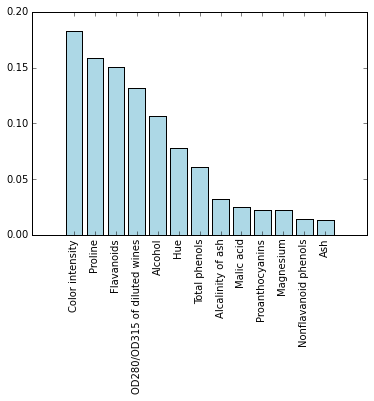

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(
    range(X_train.shape[1]),
    features[indices], 
    color="lightblue",
    align="center")

z = plt.xticks(
    range(X_train.shape[1]),
    labels[indices],
    rotation=90)